In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from matplotlib import pyplot as plt
import process
import low_structures
import visualize
import numpy as np
import cv2
plt.rcParams['figure.figsize'] = (10.0, 10.0)

(256, 333)


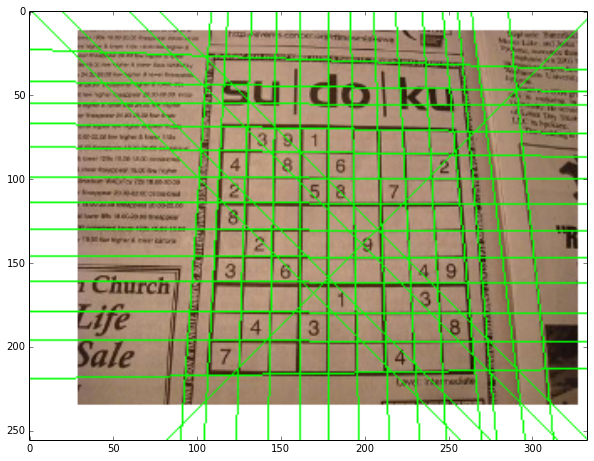

In [41]:
img_org = process.get_example_image('s8.png')  # 's6.png'
img = process.pre_process(img_org)
print img.shape
lines = process.find_lines(img, 100)
dedup = low_structures.remove_duplicate_lines(lines, 15, img.shape)

points = low_structures.intersections(dedup)
img_w_lines = visualize.draw_lines(img_org, dedup, thickness=1)
img_w_points = visualize.draw_points(img_w_lines, points.values())
_ = plt.imshow(img_w_lines)

In [42]:
bucket_size = 90.0/5.0
buckets = low_structures.generate_angle_buckets(bucket_size, step=bucket_size/2.0, ortogonal=True)
bucketed_lines = low_structures.put_lines_into_buckets(buckets, dedup)

27
18
1
1


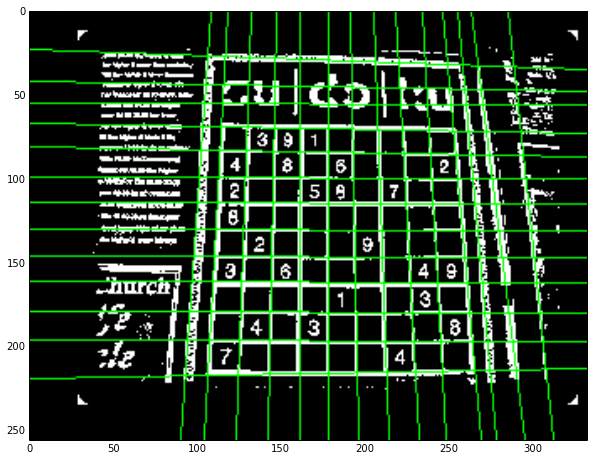

In [71]:
for i, x in enumerate(bucketed_lines):
    print len(x[1])
empty = img_org.copy()
empty.fill(0)
angle, line_class = bucketed_lines[0]
tmp = visualize.draw_lines(img, line_class, thickness=1)
# tmp = visualize.draw_lines(img, line_class, thickness=1)
_ = plt.imshow(tmp)

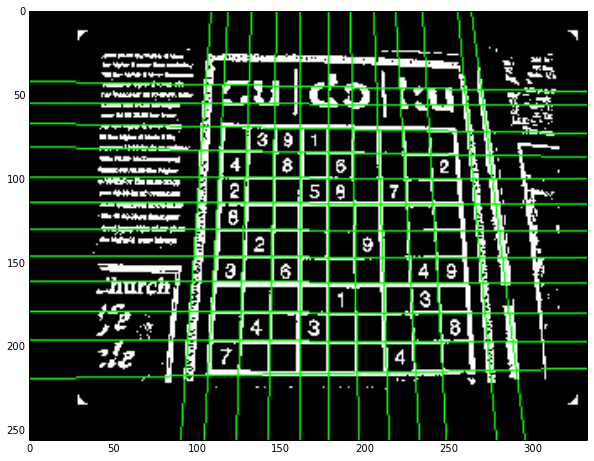

In [79]:
connected, fragment_values = low_structures.remove_disjonted_lines(img, line_class)  # not_close
# connected, fragment_values = low_structures.remove_disjonted_lines(img, connected)  # not_close

not_close = low_structures.remove_very_close_lines(connected, img.shape)

l = visualize.draw_lines(img, not_close, thickness=1, rgb=True, draw_on_empty=False)
_ = plt.imshow(l)

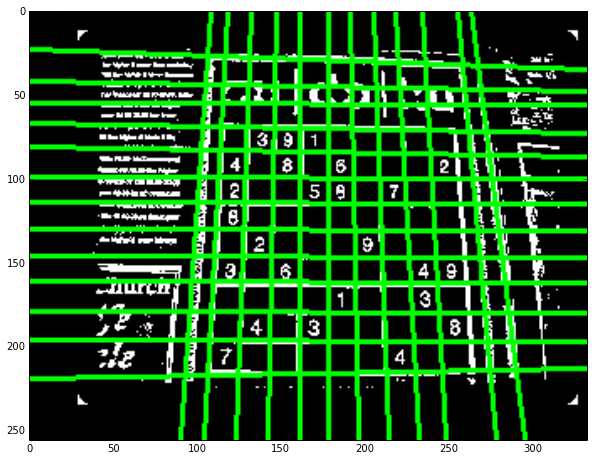

In [77]:
# connected, fragment_values = low_structures.remove_disjonted_lines(img, not_close)
# l = visualize.draw_lines(img, connected, thickness=2, rgb=True, draw_on_empty=False)
# _ = plt.imshow(l)

2.59379386137


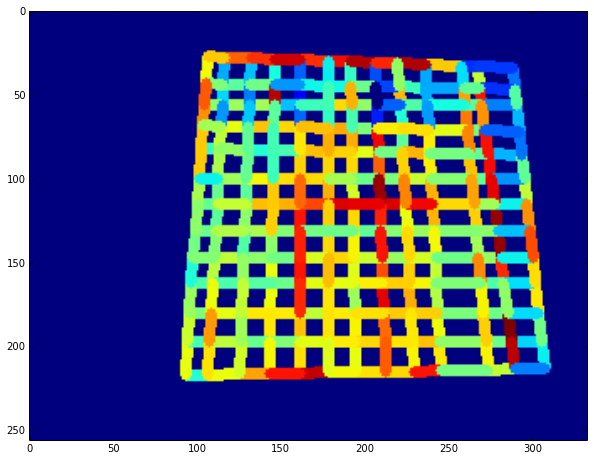

In [75]:
cpy = np.empty_like(img)
cpy.fill(0)
m = np.max(fragment_values.values())
mean = np.mean(fragment_values.values())
print mean
for (point_a, point_b), score in fragment_values.items():
    cv2.line(cpy, point_a, point_b, int(255*score/m), 5)

_ = plt.imshow(cpy)